# Export Similarity Index 
### Vietnam and Indonesia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


## Load Dataset

HS6 REV. 2007 (2008 - 2017) https://atlas.media.mit.edu/en/resources/data/

In [2]:
data = pd.read_csv("bilateral.csv") #Product Trade by Year and Country (2 digit depth)
data.head()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [3]:
data.tail()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
1915,1915,93.0,2017,8.709500e+04,1.891823e+07,0.004,0.951,4.060296e-07,0.000094,vietnam
1916,1916,94.0,2017,8.462657e+09,1.264328e+09,9.786,2.686,3.945219e-02,0.006257,vietnam
1917,1917,95.0,2017,1.807360e+09,5.063306e+08,6.024,4.607,8.425758e-03,0.002506,vietnam
1918,1918,96.0,2017,4.294399e+08,7.398881e+08,17.468,27.725,2.002013e-03,0.003661,vietnam
1919,1919,97.0,2017,2.622439e+06,1.968601e+06,0.116,0.088,1.222559e-05,0.000010,vietnam


In [4]:
del data["Unnamed: 0"]
indo = data.loc[data["country"] == "indonesia"]
viet = data.loc[data["country"] == "vietnam"]
print (indo.shape , viet.shape)
indo.info()

(960, 9) (960, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 9 columns):
hs07               960 non-null float64
year               960 non-null int64
export_val         960 non-null float64
import_val         960 non-null float64
export_rca         960 non-null float64
import_rca         960 non-null float64
export_val_perc    960 non-null float64
import_val_perc    960 non-null float64
country            960 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 75.0+ KB


In [5]:
indo.reset_index()
indo.head()

,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [6]:
viet = viet.reset_index()
viet.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,960,1.0,2008,1.655721e+07,1.116937e+07,4.081860,1.644622,0.000242,0.000146,vietnam
1,961,2.0,2008,6.023379e+07,5.483150e+08,1.473950,8.948563,0.000879,0.007155,vietnam
2,962,3.0,2008,3.823832e+09,3.213780e+08,58.491094,4.515607,0.055833,0.004194,vietnam
3,963,4.0,2008,7.817152e+07,4.092630e+08,10.241673,8.225166,0.001141,0.005340,vietnam
4,964,5.0,2008,1.147554e+07,5.598978e+07,10.733161,14.250828,0.000168,0.000731,vietnam


In [7]:
indo = pd.concat([indo, viet["export_val"]], axis=1)
indo.head()

,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,export_val
0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia,1.655721e+07
1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia,6.023379e+07
2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia,3.823832e+09
3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia,7.817152e+07
4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia,1.147554e+07


## Calculating Export Similarity Index

In [8]:
indo["minimal"]= indo["export_val"].min(axis=1)
indo.head()

,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,export_val,minimal
0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia,1.655721e+07,1.655721e+07
1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia,6.023379e+07,3.252633e+07
2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia,3.823832e+09,2.238172e+09
3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia,7.817152e+07,7.817152e+07
4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia,1.147554e+07,1.147554e+07


In [9]:
esi = indo.groupby("year")["minimal"].sum()
indo.head(10)

,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,export_val,minimal
0,1.0,2008,6.343198e+07,3.586118e+08,2.709450,9.323941,0.000489,0.003636,indonesia,1.655721e+07,1.655721e+07
1,2.0,2008,3.252633e+07,2.386460e+08,3.339772,3.733699,0.000251,0.002420,indonesia,6.023379e+07,3.252633e+07
2,3.0,2008,2.238172e+09,9.883910e+07,21.517980,1.280112,0.017256,0.001002,indonesia,3.823832e+09,2.238172e+09
3,4.0,2008,4.052109e+08,8.590542e+08,88.878893,13.697648,0.003124,0.008710,indonesia,7.817152e+07,7.817152e+07
4,5.0,2008,2.466984e+07,4.957902e+07,13.126789,16.261980,0.000190,0.000503,indonesia,1.147554e+07,1.147554e+07
5,6.0,2008,1.912414e+07,1.672156e+06,0.627102,0.078548,0.000147,0.000017,indonesia,1.630750e+07,1.630750e+07
6,7.0,2008,7.051117e+07,2.375601e+08,3.996709,12.072332,0.000544,0.002409,indonesia,2.454827e+08,7.051117e+07
7,8.0,2008,2.528138e+08,3.787358e+08,7.087518,7.121821,0.001949,0.003840,indonesia,1.173534e+09,2.528138e+08
8,9.0,2008,1.459342e+09,6.426977e+07,72.629489,15.234094,0.011251,0.000652,indonesia,2.725995e+09,1.459342e+09
9,10.0,2008,4.068046e+07,1.199860e+09,0.124561,5.801382,0.000314,0.012165,indonesia,2.835097e+09,4.068046e+07


## Plot Trend ES Index over time

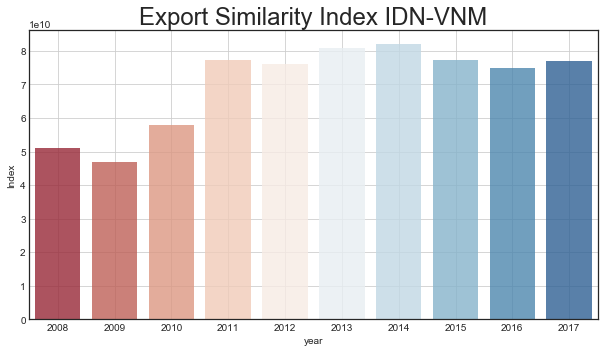

In [15]:
plt.figure(figsize=(8.5,5))
sns.barplot(esi.index, esi.values, alpha=0.8, palette="RdBu")
plt.title("Export Similarity Index IDN-VNM" , size=24)
plt.style.use('seaborn-white')
plt.ylabel("Index")
plt.tight_layout()
plt.grid(True)
plt.savefig("ESI.png")
plt.show()

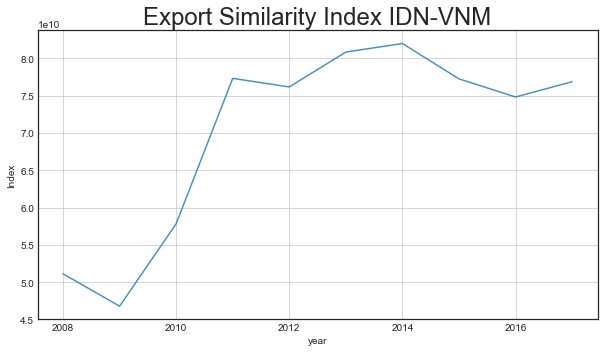

In [23]:
plt.figure(figsize=(8.5,5))
sns.lineplot(esi.index, esi.values, alpha=0.8, palette="RdBu")
plt.title("Export Similarity Index IDN-VNM" , size=24)
plt.style.use('seaborn-white')
plt.ylabel("Index")
plt.tight_layout()
plt.grid(True)
plt.savefig("ESI.png")
plt.show()